# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [25]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

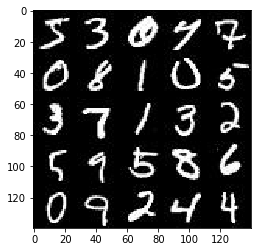

In [26]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

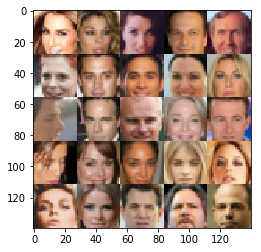

In [27]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [28]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.5.0


F:\Users\marlo\Miniconda3\envs\dog-project\lib\site-packages\ipykernel\__main__.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [29]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function
    real_input = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels), name='real_input') 
    z_input = tf.placeholder(tf.float32, (None, z_dim), name='z_input') 
    learning_rate = tf.placeholder(tf.float32, (None), name='learning_rate') 
    print(real_input)
    print(z_input)
    print(learning_rate)
    
    return real_input, z_input, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tensor("real_input:0", shape=(?, 28, 28, 3), dtype=float32)
Tensor("z_input:0", shape=(?, 100), dtype=float32)
Tensor("learning_rate:0", dtype=float32)
Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [30]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    with tf.variable_scope('discriminator', reuse=reuse):
        
        h1 = tf.layers.conv2d(images, filters=64, strides=2, kernel_size=5,  padding='same')
        h1 = tf.maximum(0.2 * h1, h1)
        
        h2 = tf.layers.conv2d(h1, filters=128, strides=2, kernel_size=5, padding='same')
        h2 = tf.maximum(0.2 * h2, h2)
        
        h3 = tf.layers.conv2d(h2, filters=256, strides=2, kernel_size=5, padding='same')
        h3 = tf.maximum(0.1 * h3, h3)
        
        flat = tf.reshape(h3, (-1, 4 * 4 * 256))
        logits = tf.layers.dense(flat, 1)
        output = tf.sigmoid(logits)

    return output, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [31]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    with tf.variable_scope('generator', reuse=not is_train):
        h1 = tf.layers.dense(z, 2 * 2 * 512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(0.2 * h1, h1)
        
        h2 = tf.layers.conv2d_transpose(h1, filters=256, strides=2, kernel_size=5)
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(0.2 * h2, h2)
        
        h3 = tf.layers.conv2d_transpose(h2, filters=128, strides=2, kernel_size=5, padding='same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(0.2 * h3, h3)
        
        logits = tf.layers.conv2d_transpose(h3, filters=out_channel_dim, kernel_size=5, strides=2, padding='same')
        
        out = tf.tanh(logits)
  
    return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [32]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim, is_train = True)
    d_model_real, d_logits_real = discriminator(input_real, reuse = False)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real) * 0.9))
    loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = loss_real + loss_fake
    
    return d_loss, loss
    
    
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [33]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    tv = tf.trainable_variables()
    discriminator = list(filter(lambda x: x.name.startswith('discriminator'), tv))
    generator = list(filter(lambda x: x.name.startswith('generator'), tv))

    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        op_descriminator = tf.train.AdamOptimizer(beta1=beta1, learning_rate=learning_rate).minimize(d_loss, var_list=discriminator)
        op_generator = tf.train.AdamOptimizer(beta1=beta1, learning_rate=learning_rate).minimize(g_loss, var_list=generator)
    
    return op_descriminator, op_generator


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [34]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [35]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    out_channel_dim = data_shape[3]
    
    input_real, input_z, lr = model_inputs(*data_shape[1:], z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, out_channel_dim)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    show_every = 100
    print_every = 10
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                steps += 1
                
                batch_images = batch_images * 2
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))
                
                sess.run(d_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})
                sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, lr: learning_rate})
                
                if steps % print_every == 0:
                    d_train_loss = d_loss.eval({input_z: batch_z, input_real: batch_images, lr: learning_rate})
                    g_train_loss = g_loss.eval({input_z: batch_z, input_real: batch_images, lr: learning_rate})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(d_train_loss),
                          "Generator Loss: {:.4f}".format(g_train_loss))
                    
                
                if steps % show_every == 0:
                    show_generator_output(sess, 25, input_z, out_channel_dim, data_image_mode)
                
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Tensor("real_input:0", shape=(?, 28, 28, 1), dtype=float32)
Tensor("z_input:0", shape=(?, 100), dtype=float32)
Tensor("learning_rate:0", dtype=float32)
Epoch 1/2... Discriminator Loss: 0.5525... Generator Loss: 2.1302
Epoch 1/2... Discriminator Loss: 0.7026... Generator Loss: 1.8190
Epoch 1/2... Discriminator Loss: 0.9549... Generator Loss: 0.9840
Epoch 1/2... Discriminator Loss: 0.7943... Generator Loss: 1.8516
Epoch 1/2... Discriminator Loss: 0.8464... Generator Loss: 1.7738
Epoch 1/2... Discriminator Loss: 0.6643... Generator Loss: 1.6999
Epoch 1/2... Discriminator Loss: 0.8541... Generator Loss: 1.3571
Epoch 1/2... Discriminator Loss: 0.6699... Generator Loss: 1.8345
Epoch 1/2... Discriminator Loss: 0.6307... Generator Loss: 2.0213
Epoch 1/2... Discriminator Loss: 0.8093... Generator Loss: 1.3692


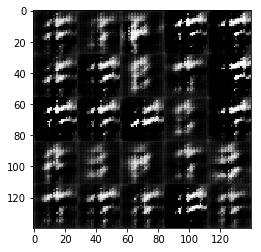

Epoch 1/2... Discriminator Loss: 0.7493... Generator Loss: 2.1621
Epoch 1/2... Discriminator Loss: 0.9317... Generator Loss: 1.6901
Epoch 1/2... Discriminator Loss: 0.6440... Generator Loss: 2.6327
Epoch 1/2... Discriminator Loss: 0.6330... Generator Loss: 2.9504
Epoch 1/2... Discriminator Loss: 0.8980... Generator Loss: 2.5693
Epoch 1/2... Discriminator Loss: 0.6078... Generator Loss: 2.6743
Epoch 1/2... Discriminator Loss: 0.7091... Generator Loss: 1.8022
Epoch 1/2... Discriminator Loss: 0.8569... Generator Loss: 1.9008
Epoch 1/2... Discriminator Loss: 0.7603... Generator Loss: 1.9028
Epoch 1/2... Discriminator Loss: 0.7992... Generator Loss: 1.7391


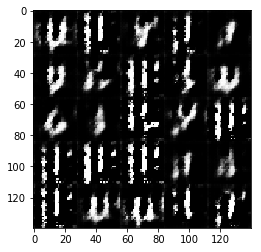

Epoch 1/2... Discriminator Loss: 0.7233... Generator Loss: 1.7239
Epoch 1/2... Discriminator Loss: 0.6655... Generator Loss: 2.5322
Epoch 1/2... Discriminator Loss: 0.6543... Generator Loss: 2.4430
Epoch 1/2... Discriminator Loss: 0.6746... Generator Loss: 2.4059
Epoch 1/2... Discriminator Loss: 0.6763... Generator Loss: 1.8640
Epoch 1/2... Discriminator Loss: 0.8007... Generator Loss: 2.3634
Epoch 1/2... Discriminator Loss: 0.7538... Generator Loss: 1.7347
Epoch 1/2... Discriminator Loss: 0.8126... Generator Loss: 3.9685
Epoch 1/2... Discriminator Loss: 0.6659... Generator Loss: 2.9578
Epoch 1/2... Discriminator Loss: 0.7737... Generator Loss: 1.6172


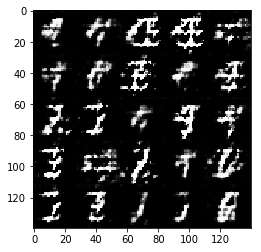

Epoch 1/2... Discriminator Loss: 0.6595... Generator Loss: 2.0871
Epoch 1/2... Discriminator Loss: 0.6669... Generator Loss: 2.8233
Epoch 1/2... Discriminator Loss: 0.6634... Generator Loss: 2.4881
Epoch 1/2... Discriminator Loss: 0.8743... Generator Loss: 1.5281
Epoch 1/2... Discriminator Loss: 0.7043... Generator Loss: 2.0523
Epoch 1/2... Discriminator Loss: 0.7908... Generator Loss: 1.6344
Epoch 1/2... Discriminator Loss: 0.7353... Generator Loss: 2.6599
Epoch 1/2... Discriminator Loss: 0.7669... Generator Loss: 2.8973
Epoch 1/2... Discriminator Loss: 0.8230... Generator Loss: 2.1997
Epoch 1/2... Discriminator Loss: 0.6633... Generator Loss: 2.2537


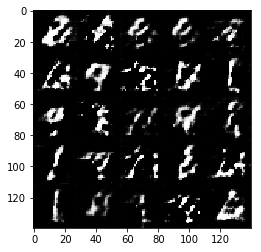

Epoch 1/2... Discriminator Loss: 0.7793... Generator Loss: 2.5728
Epoch 1/2... Discriminator Loss: 0.7355... Generator Loss: 2.0714
Epoch 1/2... Discriminator Loss: 0.6945... Generator Loss: 2.2211
Epoch 1/2... Discriminator Loss: 0.6764... Generator Loss: 2.1708
Epoch 1/2... Discriminator Loss: 0.9429... Generator Loss: 2.7303
Epoch 1/2... Discriminator Loss: 0.8551... Generator Loss: 1.3698
Epoch 1/2... Discriminator Loss: 0.7990... Generator Loss: 1.7430
Epoch 1/2... Discriminator Loss: 0.9107... Generator Loss: 1.5391
Epoch 2/2... Discriminator Loss: 0.6343... Generator Loss: 2.3390
Epoch 2/2... Discriminator Loss: 0.8509... Generator Loss: 1.5537


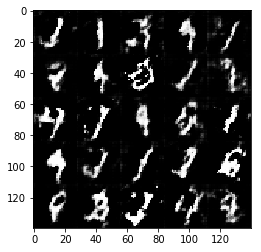

Epoch 2/2... Discriminator Loss: 0.7990... Generator Loss: 1.5571
Epoch 2/2... Discriminator Loss: 0.8760... Generator Loss: 1.4705
Epoch 2/2... Discriminator Loss: 0.8739... Generator Loss: 1.5514
Epoch 2/2... Discriminator Loss: 0.9352... Generator Loss: 2.1046
Epoch 2/2... Discriminator Loss: 1.0927... Generator Loss: 0.9849
Epoch 2/2... Discriminator Loss: 0.9251... Generator Loss: 1.9830
Epoch 2/2... Discriminator Loss: 1.0535... Generator Loss: 1.7993
Epoch 2/2... Discriminator Loss: 0.8134... Generator Loss: 1.8195
Epoch 2/2... Discriminator Loss: 0.7787... Generator Loss: 1.8422
Epoch 2/2... Discriminator Loss: 0.9107... Generator Loss: 1.7989


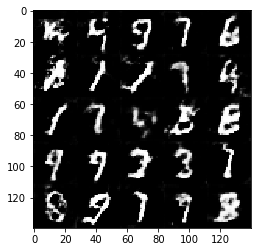

Epoch 2/2... Discriminator Loss: 0.8632... Generator Loss: 1.9482
Epoch 2/2... Discriminator Loss: 0.7637... Generator Loss: 1.6664
Epoch 2/2... Discriminator Loss: 0.7787... Generator Loss: 1.7410
Epoch 2/2... Discriminator Loss: 0.7781... Generator Loss: 1.7971
Epoch 2/2... Discriminator Loss: 0.9135... Generator Loss: 1.3003
Epoch 2/2... Discriminator Loss: 0.9822... Generator Loss: 1.4577
Epoch 2/2... Discriminator Loss: 0.9593... Generator Loss: 1.4847
Epoch 2/2... Discriminator Loss: 0.8956... Generator Loss: 1.5976
Epoch 2/2... Discriminator Loss: 1.0131... Generator Loss: 1.0951
Epoch 2/2... Discriminator Loss: 0.8709... Generator Loss: 1.4750


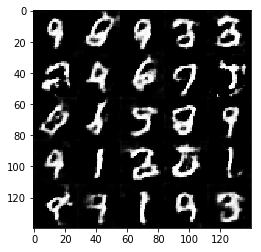

Epoch 2/2... Discriminator Loss: 0.8253... Generator Loss: 1.6846
Epoch 2/2... Discriminator Loss: 0.8566... Generator Loss: 1.7064
Epoch 2/2... Discriminator Loss: 0.8704... Generator Loss: 1.6648
Epoch 2/2... Discriminator Loss: 0.8504... Generator Loss: 1.7461
Epoch 2/2... Discriminator Loss: 1.0857... Generator Loss: 1.2033
Epoch 2/2... Discriminator Loss: 0.8882... Generator Loss: 1.4794
Epoch 2/2... Discriminator Loss: 0.9609... Generator Loss: 1.2973
Epoch 2/2... Discriminator Loss: 0.9102... Generator Loss: 1.3770
Epoch 2/2... Discriminator Loss: 0.9734... Generator Loss: 1.3111
Epoch 2/2... Discriminator Loss: 0.8561... Generator Loss: 1.7299


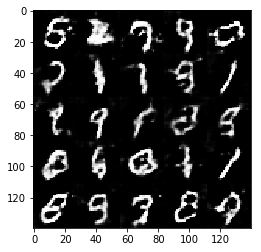

Epoch 2/2... Discriminator Loss: 0.9767... Generator Loss: 1.2190
Epoch 2/2... Discriminator Loss: 0.9114... Generator Loss: 1.4093
Epoch 2/2... Discriminator Loss: 1.0066... Generator Loss: 1.2064
Epoch 2/2... Discriminator Loss: 1.0959... Generator Loss: 1.6654
Epoch 2/2... Discriminator Loss: 1.0575... Generator Loss: 1.9274
Epoch 2/2... Discriminator Loss: 1.0302... Generator Loss: 1.5482
Epoch 2/2... Discriminator Loss: 0.9863... Generator Loss: 1.3377
Epoch 2/2... Discriminator Loss: 0.9402... Generator Loss: 1.2163
Epoch 2/2... Discriminator Loss: 1.1149... Generator Loss: 0.8765
Epoch 2/2... Discriminator Loss: 1.1467... Generator Loss: 1.4015


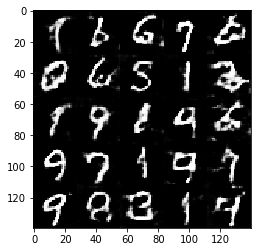

Epoch 2/2... Discriminator Loss: 1.0088... Generator Loss: 1.3113
Epoch 2/2... Discriminator Loss: 0.8693... Generator Loss: 1.7481
Epoch 2/2... Discriminator Loss: 1.2167... Generator Loss: 1.2651
Epoch 2/2... Discriminator Loss: 1.1956... Generator Loss: 0.8410
Epoch 2/2... Discriminator Loss: 0.9110... Generator Loss: 1.3421
Epoch 2/2... Discriminator Loss: 0.8181... Generator Loss: 1.4976


In [36]:
batch_size = 124
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Tensor("real_input:0", shape=(?, 28, 28, 3), dtype=float32)
Tensor("z_input:0", shape=(?, 100), dtype=float32)
Tensor("learning_rate:0", dtype=float32)
Epoch 1/1... Discriminator Loss: 0.4919... Generator Loss: 3.8477
Epoch 1/1... Discriminator Loss: 0.5952... Generator Loss: 1.9766
Epoch 1/1... Discriminator Loss: 0.9820... Generator Loss: 0.8765
Epoch 1/1... Discriminator Loss: 1.1111... Generator Loss: 1.8468
Epoch 1/1... Discriminator Loss: 0.7819... Generator Loss: 1.9154
Epoch 1/1... Discriminator Loss: 0.9178... Generator Loss: 1.9945
Epoch 1/1... Discriminator Loss: 0.9825... Generator Loss: 1.4240
Epoch 1/1... Discriminator Loss: 1.0216... Generator Loss: 1.2652
Epoch 1/1... Discriminator Loss: 0.8690... Generator Loss: 1.3872
Epoch 1/1... Discriminator Loss: 1.6334... Generator Loss: 0.3740


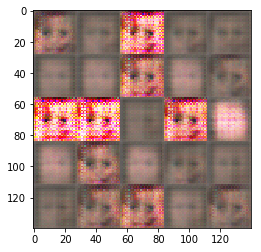

Epoch 1/1... Discriminator Loss: 0.9303... Generator Loss: 1.4029
Epoch 1/1... Discriminator Loss: 0.8852... Generator Loss: 1.2624
Epoch 1/1... Discriminator Loss: 1.1578... Generator Loss: 0.9410
Epoch 1/1... Discriminator Loss: 1.2130... Generator Loss: 1.1122
Epoch 1/1... Discriminator Loss: 1.1217... Generator Loss: 2.2317
Epoch 1/1... Discriminator Loss: 1.3335... Generator Loss: 2.0079
Epoch 1/1... Discriminator Loss: 1.1344... Generator Loss: 1.2332
Epoch 1/1... Discriminator Loss: 0.9962... Generator Loss: 1.1736
Epoch 1/1... Discriminator Loss: 1.0739... Generator Loss: 1.1193
Epoch 1/1... Discriminator Loss: 1.2054... Generator Loss: 1.2236


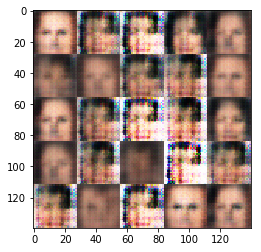

Epoch 1/1... Discriminator Loss: 1.0302... Generator Loss: 1.3829
Epoch 1/1... Discriminator Loss: 0.9316... Generator Loss: 1.2831
Epoch 1/1... Discriminator Loss: 1.0100... Generator Loss: 1.2670
Epoch 1/1... Discriminator Loss: 0.9505... Generator Loss: 1.3031
Epoch 1/1... Discriminator Loss: 1.2810... Generator Loss: 1.0366
Epoch 1/1... Discriminator Loss: 1.2734... Generator Loss: 0.6649
Epoch 1/1... Discriminator Loss: 1.1367... Generator Loss: 0.8920
Epoch 1/1... Discriminator Loss: 0.9800... Generator Loss: 1.0060
Epoch 1/1... Discriminator Loss: 1.2081... Generator Loss: 0.9617
Epoch 1/1... Discriminator Loss: 1.1748... Generator Loss: 1.0007


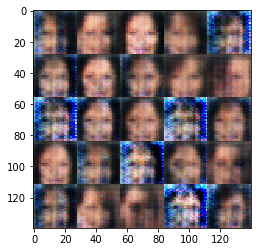

Epoch 1/1... Discriminator Loss: 1.1270... Generator Loss: 1.7460
Epoch 1/1... Discriminator Loss: 2.0812... Generator Loss: 0.3721
Epoch 1/1... Discriminator Loss: 1.0299... Generator Loss: 1.1477
Epoch 1/1... Discriminator Loss: 1.0120... Generator Loss: 1.3137
Epoch 1/1... Discriminator Loss: 1.9472... Generator Loss: 2.8611
Epoch 1/1... Discriminator Loss: 1.0935... Generator Loss: 1.1643
Epoch 1/1... Discriminator Loss: 0.9027... Generator Loss: 1.1621
Epoch 1/1... Discriminator Loss: 1.4185... Generator Loss: 0.7424
Epoch 1/1... Discriminator Loss: 1.0686... Generator Loss: 1.2555
Epoch 1/1... Discriminator Loss: 1.0150... Generator Loss: 1.1370


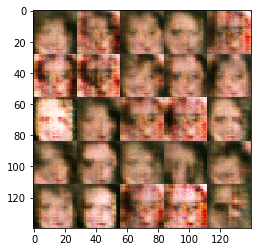

Epoch 1/1... Discriminator Loss: 1.1093... Generator Loss: 1.0870
Epoch 1/1... Discriminator Loss: 1.2011... Generator Loss: 0.7726
Epoch 1/1... Discriminator Loss: 1.2556... Generator Loss: 1.6130
Epoch 1/1... Discriminator Loss: 0.9197... Generator Loss: 2.0870
Epoch 1/1... Discriminator Loss: 0.9616... Generator Loss: 1.2521
Epoch 1/1... Discriminator Loss: 0.9879... Generator Loss: 1.2956
Epoch 1/1... Discriminator Loss: 1.0253... Generator Loss: 1.1739
Epoch 1/1... Discriminator Loss: 1.1478... Generator Loss: 1.0313
Epoch 1/1... Discriminator Loss: 1.1882... Generator Loss: 0.8020
Epoch 1/1... Discriminator Loss: 1.0228... Generator Loss: 1.2318


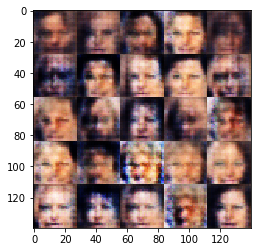

Epoch 1/1... Discriminator Loss: 0.9512... Generator Loss: 1.2870
Epoch 1/1... Discriminator Loss: 1.0912... Generator Loss: 1.1818
Epoch 1/1... Discriminator Loss: 1.0507... Generator Loss: 1.1615
Epoch 1/1... Discriminator Loss: 1.0542... Generator Loss: 1.2628
Epoch 1/1... Discriminator Loss: 0.9910... Generator Loss: 1.4628
Epoch 1/1... Discriminator Loss: 0.9846... Generator Loss: 1.1479
Epoch 1/1... Discriminator Loss: 1.0174... Generator Loss: 1.0293
Epoch 1/1... Discriminator Loss: 1.2064... Generator Loss: 1.4856
Epoch 1/1... Discriminator Loss: 1.0482... Generator Loss: 1.1562
Epoch 1/1... Discriminator Loss: 1.0125... Generator Loss: 0.9735


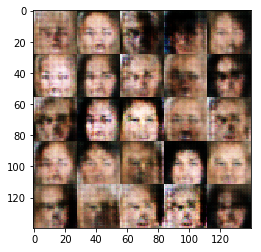

Epoch 1/1... Discriminator Loss: 1.1461... Generator Loss: 0.9593
Epoch 1/1... Discriminator Loss: 1.6379... Generator Loss: 2.6000
Epoch 1/1... Discriminator Loss: 1.1144... Generator Loss: 1.0864
Epoch 1/1... Discriminator Loss: 1.1025... Generator Loss: 1.9551
Epoch 1/1... Discriminator Loss: 1.1538... Generator Loss: 0.9923
Epoch 1/1... Discriminator Loss: 1.0577... Generator Loss: 0.8242
Epoch 1/1... Discriminator Loss: 1.1898... Generator Loss: 0.8148
Epoch 1/1... Discriminator Loss: 1.1068... Generator Loss: 1.0637
Epoch 1/1... Discriminator Loss: 2.1489... Generator Loss: 2.9059
Epoch 1/1... Discriminator Loss: 1.1020... Generator Loss: 1.1306


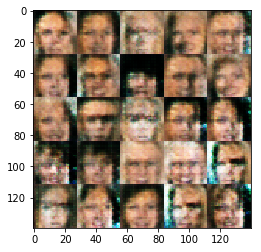

Epoch 1/1... Discriminator Loss: 1.0470... Generator Loss: 1.7470
Epoch 1/1... Discriminator Loss: 1.3154... Generator Loss: 1.7137
Epoch 1/1... Discriminator Loss: 1.1087... Generator Loss: 1.1987
Epoch 1/1... Discriminator Loss: 0.8331... Generator Loss: 1.5236
Epoch 1/1... Discriminator Loss: 1.0694... Generator Loss: 1.5659
Epoch 1/1... Discriminator Loss: 1.0392... Generator Loss: 1.5386
Epoch 1/1... Discriminator Loss: 1.0646... Generator Loss: 1.0029
Epoch 1/1... Discriminator Loss: 0.9337... Generator Loss: 1.2855
Epoch 1/1... Discriminator Loss: 0.9907... Generator Loss: 1.3497
Epoch 1/1... Discriminator Loss: 0.9913... Generator Loss: 1.1528


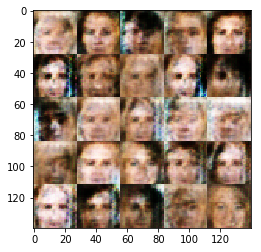

Epoch 1/1... Discriminator Loss: 0.8384... Generator Loss: 1.2482
Epoch 1/1... Discriminator Loss: 1.0388... Generator Loss: 1.1880
Epoch 1/1... Discriminator Loss: 1.0408... Generator Loss: 1.0104
Epoch 1/1... Discriminator Loss: 1.0103... Generator Loss: 1.1847
Epoch 1/1... Discriminator Loss: 1.0062... Generator Loss: 1.2298
Epoch 1/1... Discriminator Loss: 1.1132... Generator Loss: 1.1226
Epoch 1/1... Discriminator Loss: 1.0213... Generator Loss: 1.2706
Epoch 1/1... Discriminator Loss: 0.8884... Generator Loss: 1.4614
Epoch 1/1... Discriminator Loss: 0.9822... Generator Loss: 1.2111
Epoch 1/1... Discriminator Loss: 1.0617... Generator Loss: 0.9284


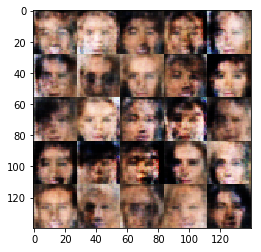

Epoch 1/1... Discriminator Loss: 1.0508... Generator Loss: 1.2676
Epoch 1/1... Discriminator Loss: 1.0074... Generator Loss: 1.2693
Epoch 1/1... Discriminator Loss: 1.0401... Generator Loss: 1.3868
Epoch 1/1... Discriminator Loss: 0.9793... Generator Loss: 1.3647
Epoch 1/1... Discriminator Loss: 0.9360... Generator Loss: 1.3279
Epoch 1/1... Discriminator Loss: 1.0720... Generator Loss: 0.9248
Epoch 1/1... Discriminator Loss: 1.0138... Generator Loss: 0.9785
Epoch 1/1... Discriminator Loss: 1.2232... Generator Loss: 0.7200
Epoch 1/1... Discriminator Loss: 1.0283... Generator Loss: 1.0960
Epoch 1/1... Discriminator Loss: 1.0649... Generator Loss: 0.9810


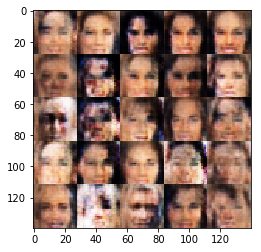

Epoch 1/1... Discriminator Loss: 1.0575... Generator Loss: 1.0667
Epoch 1/1... Discriminator Loss: 0.9369... Generator Loss: 1.5985
Epoch 1/1... Discriminator Loss: 1.0610... Generator Loss: 1.7283
Epoch 1/1... Discriminator Loss: 1.0668... Generator Loss: 1.1377
Epoch 1/1... Discriminator Loss: 0.9402... Generator Loss: 1.3278
Epoch 1/1... Discriminator Loss: 1.0148... Generator Loss: 1.1840
Epoch 1/1... Discriminator Loss: 1.0040... Generator Loss: 1.7202
Epoch 1/1... Discriminator Loss: 1.0213... Generator Loss: 1.0558
Epoch 1/1... Discriminator Loss: 1.0485... Generator Loss: 1.0683
Epoch 1/1... Discriminator Loss: 1.2052... Generator Loss: 0.7841


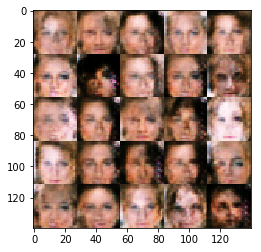

Epoch 1/1... Discriminator Loss: 1.1157... Generator Loss: 0.9426
Epoch 1/1... Discriminator Loss: 1.1539... Generator Loss: 0.8345
Epoch 1/1... Discriminator Loss: 1.1403... Generator Loss: 0.9749
Epoch 1/1... Discriminator Loss: 1.0404... Generator Loss: 1.3130
Epoch 1/1... Discriminator Loss: 0.9564... Generator Loss: 1.3525
Epoch 1/1... Discriminator Loss: 0.8229... Generator Loss: 1.6032
Epoch 1/1... Discriminator Loss: 1.0120... Generator Loss: 1.1035
Epoch 1/1... Discriminator Loss: 1.0967... Generator Loss: 1.7215
Epoch 1/1... Discriminator Loss: 0.8984... Generator Loss: 1.2448
Epoch 1/1... Discriminator Loss: 0.9851... Generator Loss: 1.0435


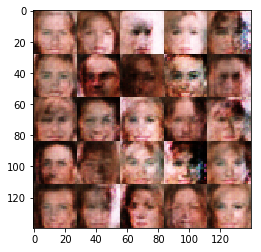

Epoch 1/1... Discriminator Loss: 0.9833... Generator Loss: 1.5397
Epoch 1/1... Discriminator Loss: 0.9743... Generator Loss: 1.1732
Epoch 1/1... Discriminator Loss: 1.0055... Generator Loss: 1.2895
Epoch 1/1... Discriminator Loss: 0.9557... Generator Loss: 1.2033
Epoch 1/1... Discriminator Loss: 1.0479... Generator Loss: 1.0488
Epoch 1/1... Discriminator Loss: 0.9448... Generator Loss: 1.2706
Epoch 1/1... Discriminator Loss: 1.3586... Generator Loss: 0.8509
Epoch 1/1... Discriminator Loss: 0.9592... Generator Loss: 1.1341
Epoch 1/1... Discriminator Loss: 0.9519... Generator Loss: 1.4427
Epoch 1/1... Discriminator Loss: 0.9244... Generator Loss: 1.2670


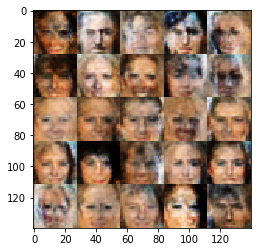

Epoch 1/1... Discriminator Loss: 1.0422... Generator Loss: 0.9275
Epoch 1/1... Discriminator Loss: 1.3296... Generator Loss: 0.6703
Epoch 1/1... Discriminator Loss: 1.1075... Generator Loss: 0.9813
Epoch 1/1... Discriminator Loss: 1.0100... Generator Loss: 1.1658
Epoch 1/1... Discriminator Loss: 1.0097... Generator Loss: 1.0149
Epoch 1/1... Discriminator Loss: 0.9540... Generator Loss: 1.4273
Epoch 1/1... Discriminator Loss: 0.9906... Generator Loss: 1.3942
Epoch 1/1... Discriminator Loss: 1.0804... Generator Loss: 0.9649
Epoch 1/1... Discriminator Loss: 0.9903... Generator Loss: 1.3596
Epoch 1/1... Discriminator Loss: 0.9966... Generator Loss: 1.5792


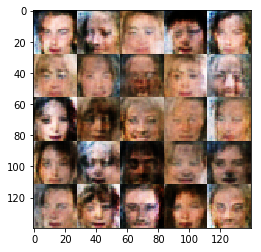

Epoch 1/1... Discriminator Loss: 0.9549... Generator Loss: 1.2412
Epoch 1/1... Discriminator Loss: 1.0156... Generator Loss: 1.1099
Epoch 1/1... Discriminator Loss: 1.2324... Generator Loss: 0.9501
Epoch 1/1... Discriminator Loss: 0.9970... Generator Loss: 1.3356
Epoch 1/1... Discriminator Loss: 1.0816... Generator Loss: 1.0701
Epoch 1/1... Discriminator Loss: 0.9496... Generator Loss: 1.3611
Epoch 1/1... Discriminator Loss: 1.6847... Generator Loss: 2.1489
Epoch 1/1... Discriminator Loss: 1.4430... Generator Loss: 1.9928
Epoch 1/1... Discriminator Loss: 1.1925... Generator Loss: 1.2837
Epoch 1/1... Discriminator Loss: 1.0679... Generator Loss: 1.1305


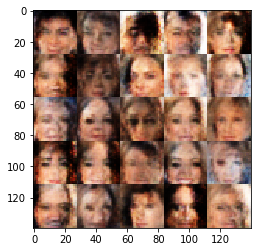

Epoch 1/1... Discriminator Loss: 1.0315... Generator Loss: 1.1173
Epoch 1/1... Discriminator Loss: 1.0028... Generator Loss: 1.1486
Epoch 1/1... Discriminator Loss: 1.0011... Generator Loss: 1.6287
Epoch 1/1... Discriminator Loss: 1.0236... Generator Loss: 1.5840
Epoch 1/1... Discriminator Loss: 1.0995... Generator Loss: 2.0425
Epoch 1/1... Discriminator Loss: 0.9504... Generator Loss: 1.1324
Epoch 1/1... Discriminator Loss: 0.9911... Generator Loss: 1.3262
Epoch 1/1... Discriminator Loss: 1.8876... Generator Loss: 0.6387
Epoch 1/1... Discriminator Loss: 1.1184... Generator Loss: 1.0428
Epoch 1/1... Discriminator Loss: 1.0144... Generator Loss: 1.0705


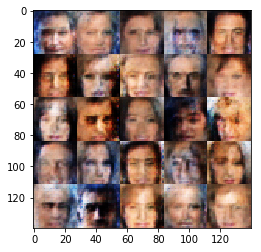

Epoch 1/1... Discriminator Loss: 1.0272... Generator Loss: 1.0251
Epoch 1/1... Discriminator Loss: 0.9869... Generator Loss: 1.1461
Epoch 1/1... Discriminator Loss: 1.0898... Generator Loss: 0.9387


In [37]:
batch_size = 124
z_dim = 100
learning_rate = 0.001
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.